# Transformer different tasks :


The Transformer architecture is a versatile and powerful neural network architecture that has been applied to a wide range of natural language processing (NLP) and machine learning tasks. Its key innovation is the attention mechanism, which allows it to process sequences of data, such as text or time series, in parallel and capture long-range dependencies effectively. Here are some of the different tasks for which the Transformer architecture has been successfully used:

1. Text Classification: Transformers have been used for various text classification tasks, including sentiment analysis, spam detection, and topic classification. They can learn to understand the context and semantics of text data, making them highly effective for these tasks.

2. Question Answering: Models like BERT and its variants have shown impressive performance on question-answering tasks, where the model is given a passage of text and a question and must identify the answer within the passage.


3. Masked Language Modeling (MLM) : is a type of language modeling task used in the context of Transformers, particularly in models like BERT (Bidirectional Encoder Representations from Transformers) and its variants. The goal of MLM is to train a model to predict missing or masked words in a given text, which encourages the model to learn contextual understanding and representations of words.

4. Causal Language Modeling : is a language modeling task used in the context of Transformers, particularly in models like GPT (Generative Pretrained Transformers) and its variants. In Causal Language Modeling, the goal is to generate text sequentially, one token at a time, while taking into account only the preceding context. This contrasts with Masked Language Modeling (MLM), where the model tries to predict masked tokens in a bidirectional manner.

5. Named Entity Recognition : Named Entity Recognition (NER): Transformers can identify and classify named entities (such as names of people, organizations, locations, and more) within text, which is crucial for information extraction, document summarization, and question answering systems.

6. Text Summarization: Transformers can summarize long documents into shorter, coherent versions, which is valuable for information retrieval and document understanding applications.

7. Machine Translation: The Transformer model, especially in its variants like the original "Transformer" and "BERT" (Bidirectional Encoder Representations from Transformers), has revolutionized machine translation tasks. It can translate text from one language to another with state-of-the-art performance. Models like Google's "BERT" and Facebook's "MarianMT" are examples.


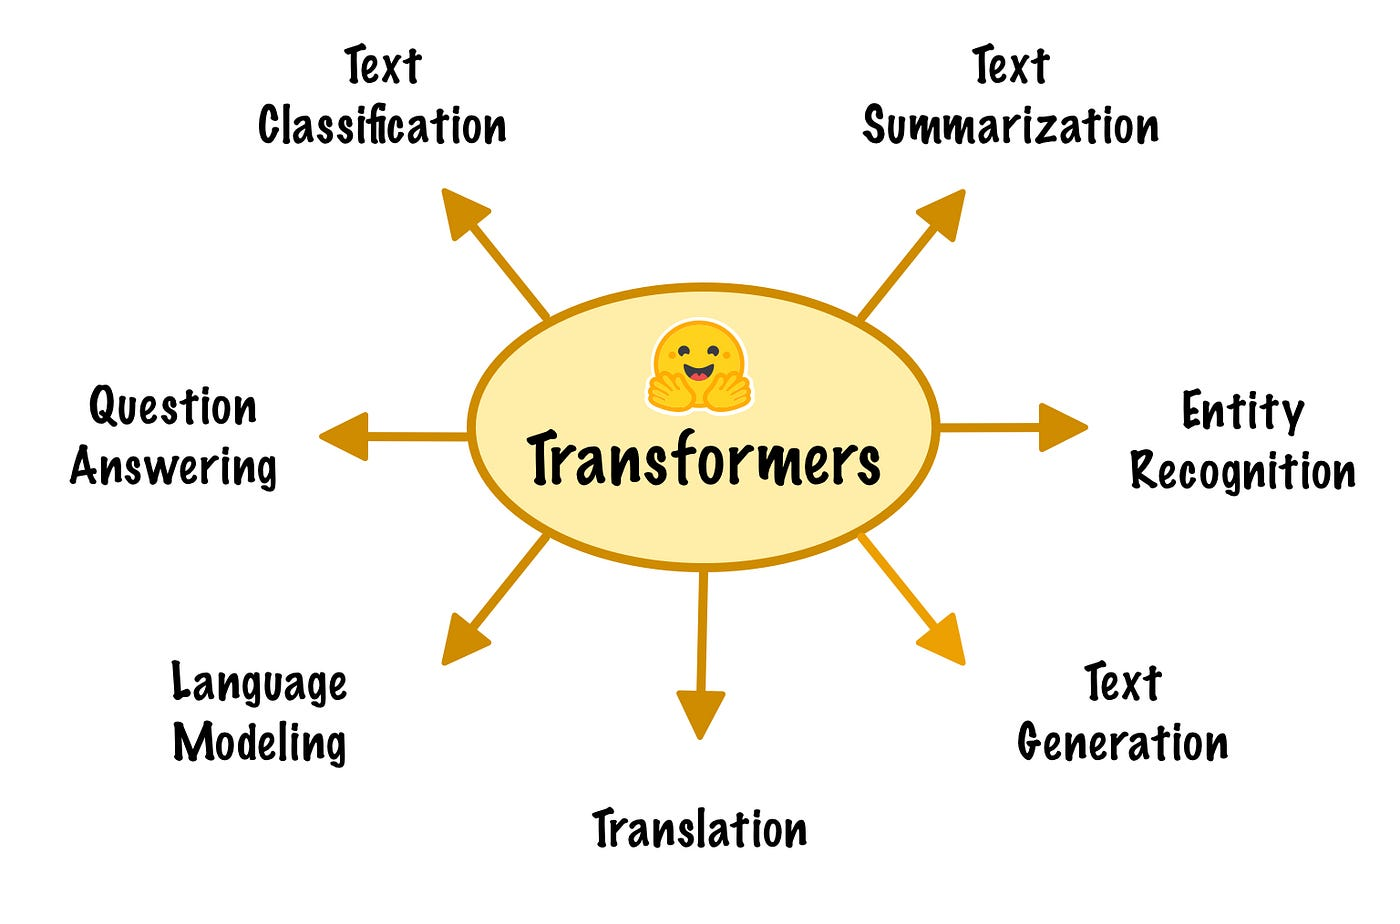

In [2]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00


# Summary of the tasks

This Notebook shows the most frequent use-cases when using the library. The models available allow for many different
configurations and a great versatility in use-cases. The most simple ones are presented here, showcasing usage for
tasks such as question answering, sequence classification, named entity recognition and others.



> **NOTE:** All tasks presented here leverage pre-trained checkpoints that were fine-tuned on specific tasks. Loading a
> checkpoint that was not fine-tuned on a specific task would load only the base transformer layers and not the
> additional head that is used for the task, initializing the weights of that head randomly.
>
> This would produce random output.

## Sequence Classification

Sequence classification is the task of classifying sequences according to a given number of classes. An example of
sequence classification is the GLUE dataset, which is entirely based on that task. If you would like to fine-tune a
model on a GLUE sequence classification task, you may leverage the : prefix_link:*run_glue.py
<examples/pytorch/text-classification/run_glue.py>*, :prefix_link:*run_tf_glue.py
<examples/tensorflow/text-classification/run_tf_glue.py>*, :prefix_link:*run_tf_text_classification.py
<examples/tensorflow/text-classification/run_tf_text_classification.py>* or :prefix_link:*run_xnli.py
<examples/pytorch/text-classification/run_xnli.py>* scripts.

Here is an example of using pipelines to do sentiment analysis: identifying if a sequence is positive or negative. It
leverages a fine-tuned model on sst2, which is a GLUE task.

This returns a label ("POSITIVE" or "NEGATIVE") alongside a score, as follows:

In [ ]:
# Import the 'pipeline' function from the 'transformers' library, which allows us to easily use pre-trained NLP models.
from transformers import pipeline

# Create a sentiment analysis pipeline using a pre-trained model. This pipeline can classify the sentiment of text.
classifier = pipeline("sentiment-analysis")

# Analyze the sentiment of the text "I hate you" using the sentiment analysis pipeline and store the result.
result = classifier("I hate you")[0]

# Print the sentiment label (e.g., 'LABEL_1' for negative sentiment) and the confidence score (probability) of the prediction.
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

# Analyze the sentiment of the text "I love you" using the sentiment analysis pipeline and store the result.
result = classifier("I love you")[0]

# Print the sentiment label (e.g., 'LABEL_2' for positive sentiment) and the confidence score (probability) of the prediction.
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


label: NEGATIVE, with score: 0.9991
label: POSITIVE, with score: 0.9999


Here is an example of doing a sequence classification using a model to determine if two sequences are paraphrases of
each other. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Build a sequence from the two sentences, with the correct model-specific separators, token type ids and attention
   masks (which will be created automatically by the tokenizer).
3. Pass this sequence through the model so that it is classified in one of the two available classes: 0 (not a
   paraphrase) and 1 (is a paraphrase).
4. Compute the softmax of the result to get probabilities over the classes.
5. Print the results.

In [ ]:
## PYTORCH CODE

# Import necessary libraries from the Transformers library and PyTorch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the pre-trained tokenizer and model for sequence classification (MRPC dataset)
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

# Define the classes for classification (paraphrase and not paraphrase)
classes = ["not paraphrase", "is paraphrase"]

# Define three example sequences for comparison
sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

# Tokenize the sequences using the tokenizer. It also adds special tokens and computes attention masks.
paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt")

# Get the classification logits from the model for both paraphrase and not paraphrase examples
paraphrase_classification_logits = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits

# Apply softmax to convert logits to probabilities and convert to a list
paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

# Print the results as percentages for each class

# For the "paraphrase" example
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")

# For the "not paraphrase" example
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")


not paraphrase: 10%
is paraphrase: 90%
not paraphrase: 94%
is paraphrase: 6%


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load the pre-trained tokenizer and model for BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = TFBertForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

# Define the classes for classification (paraphrase and not paraphrase)
classes = ["not paraphrase", "is paraphrase"]

# Define three example sequences for comparison
sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

# Tokenize the sequences using the tokenizer
paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="tf")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="tf")

# Get the classification logits from the model for both paraphrase and not paraphrase examples
paraphrase_classification_logits = model(paraphrase.input_ids).logits
not_paraphrase_classification_logits = model(not_paraphrase.input_ids).logits

# Apply softmax to convert logits to probabilities and convert to a numpy array
paraphrase_results = tf.nn.softmax(paraphrase_classification_logits, axis=1).numpy()[0]
not_paraphrase_results = tf.nn.softmax(not_paraphrase_classification_logits, axis=1).numpy()[0]

# Print the results as percentages for each class

# For the "paraphrase" example
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")

# For the "not paraphrase" example
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


not paraphrase: 89%
is paraphrase: 11%
not paraphrase: 92%
is paraphrase: 8%


The differences in results between the PyTorch code and TensorFlow code can occur due to several factors like :

* Random Initialization: Deep learning models, including Transformers, often have random initialization of weights. As a result, running the same model with the same data multiple times can produce slightly different results due to the randomness in initialization.

* Platform-Specific Implementation: The PyTorch and TensorFlow versions of pre-trained models may have subtle differences in how they implement certain operations or handle input data. These platform-specific differences can lead to variations in results.

## Extractive Question Answering

Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a
model on a SQuAD task, you may leverage the [run_qa.py](https://github.com/huggingface/transformers/tree/master/examples/pytorch/question-answering/run_qa.py) and
[run_tf_squad.py](https://github.com/huggingface/transformers/tree/master/examples/tensorflow/question-answering/run_tf_squad.py)
scripts.


Here is an example of using pipelines to do question answering: extracting an answer from a text given a question. It
leverages a fine-tuned model on SQuAD.

In [ ]:
# Import the pipeline module from the transformers library
from transformers import pipeline

# Create a question answering pipeline
question_answerer = pipeline("question-answering",model='bert-large-uncased-whole-word-masking-finetuned-squad')

# Define the context (text) from which you want to extract answers
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question.
An example of a question answering dataset is the SQuAD dataset, which is entirely based on that task.
If you would like to fine-tune a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
"""


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This returns an answer extracted from the text, a confidence score, alongside "start" and "end" values, which are the
positions of the extracted answer in the text.

In [ ]:
# Use the question_answerer pipeline to answer the first question
result1 = question_answerer(question="What is extractive question answering?", context=context)

# Print the answer, confidence score, and the start and end positions of the answer in the context
print(f"Answer: '{result1['answer']}', score: {round(result1['score'], 4)}, start: {result1['start']}, end: {result1['end']}")

# Use the question_answerer pipeline to answer the second question
result2 = question_answerer(question="What is a good example of a question answering dataset?", context=context)

# Print the answer, confidence score, and the start and end positions of the answer in the context
print(f"Answer: '{result2['answer']}', score: {round(result2['score'], 4)}, start: {result2['start']}, end: {result2['end']}")


Answer: 'the task of extracting an answer from a text given a question', score: 0.5388, start: 34, end: 95
Answer: 'SQuAD dataset', score: 0.5438, start: 147, end: 160


Here is an example of question answering using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define a text and a few questions.
3. Iterate over the questions and build a sequence from the text and the current question, with the correct
   model-specific separators token type ids and attention masks.
4. Pass this sequence through the model. This outputs a range of scores across the entire sequence tokens (question and
   text), for both the start and end positions.
5. Compute the softmax of the result to get probabilities over the tokens.
6. Fetch the tokens from the identified start and stop values, convert those tokens to a string.
7. Print the results.

In [ ]:
## PYTORCH CODE

# Import necessary libraries and modules from transformers
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# Load the pre-trained tokenizer and model for question answering
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# Define the text (context) for which you want to answer questions
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

# List of questions to be answered based on the provided context
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]

# Iterate through each question
for question in questions:
    # Tokenize the question and context and prepare them as inputs for the model
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    # Get the model's predictions for answer start and end positions
    outputs = model(**inputs)
    # Extract answer start scores from the model's output
    answer_start_scores = outputs.start_logits
    # Extract answer end scores from the model's output
    answer_end_scores = outputs.end_logits

    # Find the most likely start and end positions for the answer
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1  # Add 1 to include the end position

    # Convert the predicted answer tokens back into a string
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    # Print the question and the predicted answer
    print(f"Question: {question}")
    print(f"Answer: {answer}")


Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: tensorflow 2. 0 and pytorch


In [ ]:
## TENSORFLOW CODE

# Import necessary libraries and modules from transformers
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering

# Load the pre-trained tokenizer and model for question answering
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = TFAutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# Define the text (context) for which you want to answer questions
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

# List of questions to be answered based on the provided context
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]

# Iterate through each question
for question in questions:
    # Tokenize the question and context and prepare them as inputs for the model
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="tf")
    input_ids = inputs["input_ids"].numpy()[0]

    # Get the model's predictions for answer start and end positions
    outputs = model(inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Find the most likely start and end positions for the answer
    answer_start = tf.argmax(answer_start_scores, axis=1).numpy()[0]
    answer_end = (tf.argmax(answer_end_scores, axis=1) + 1).numpy()[0]  # Add 1 to include the end position

    # Convert the predicted answer tokens back into a string
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    # Print the question and the predicted answer
    print(f"Question: {question}")
    print(f"Answer: {answer}")


All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

All the weights of TFBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: tensorflow 2. 0 and pytorch


## Language Modeling

Language modeling is the task of fitting a model to a corpus, which can be domain specific. All popular
transformer-based models are trained using a variant of language modeling, e.g. BERT with masked language modeling,
GPT-2 with causal language modeling.

Language modeling can be useful outside of pretraining as well, for example to shift the model distribution to be
domain-specific: using a language model trained over a very large corpus, and then fine-tuning it to a news dataset or
on scientific papers e.g. [LysandreJik/arxiv-nlp](https://huggingface.co/lysandre/arxiv-nlp).

### Masked Language Modeling

Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to
fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the
right of the mask) and the left context (tokens on the left of the mask). Such a training creates a strong basis for
downstream tasks requiring bi-directional context, such as SQuAD (question answering, see [Lewis, Lui, Goyal et al.](https://arxiv.org/abs/1910.13461), part 4.2). If you would like to fine-tune a model on a masked language modeling
task, you may leverage the :prefix_link:*run_mlm.py <examples/pytorch/language-modeling/run_mlm.py>* script.

Here is an example of using pipelines to replace a mask from a sequence:

In [ ]:
# Import the pipeline module from the transformers library
from transformers import pipeline

# Create a "fill-mask" pipeline for masked language modeling tasks
unmasker = pipeline("fill-mask")


No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This outputs the sequences with the mask filled, the confidence score, and the token id in the tokenizer vocabulary:

In [ ]:
# Import the pprint module to pretty-print the output
from pprint import pprint

# Use the unmasker to fill in the masked token in the input sentence
# and print the results in a readable format
pprint(unmasker(f"HuggingFace is creating a {unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks."))


[{'score': 0.1792753040790558,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.11349457502365112,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.0524352565407753,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.03493547439575195,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.02860245294868946,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


Here is an example of doing masked language modeling using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a DistilBERT model and
   loads it with the weights stored in the checkpoint.
2. Define a sequence with a masked token, placing the `tokenizer.mask_token` instead of a word.
3. Encode that sequence into a list of IDs and find the position of the masked token in that list.
4. Retrieve the predictions at the index of the mask token: this tensor has the same size as the vocabulary, and the
   values are the scores attributed to each token. The model gives higher score to tokens it deems probable in that
   context.
5. Retrieve the top 5 tokens using the PyTorch `topk` or TensorFlow `top_k` methods.
6. Replace the mask token by the tokens and print the results

In [ ]:
## PYTORCH CODE

# Import necessary modules from the transformers library
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch

# Initialize the tokenizer and model for masked language modeling
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelWithLMHead.from_pretrained("distilbert-base-cased")

# Define the input sequence with a masked token
sequence = f"Distilled models are smaller than the models they mimic. Using them instead of the large versions would help {tokenizer.mask_token} our carbon footprint."

# Tokenize the input sequence and convert it into PyTorch tensors
input = tokenizer.encode(sequence, return_tensors="pt")

# Find the index of the masked token in the input
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]

# Get the logits for all tokens in the input sequence
token_logits = model(input).logits

# Extract the logits for the masked token
mask_token_logits = token_logits[0, mask_token_index, :]

# Find the top 5 predicted tokens with the highest logits
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1479: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


This prints five sequences, with the top 5 tokens predicted by the model:

In [ ]:
# Iterate through the top 5 predicted tokens
for token in top_5_tokens:
    # Replace the masked token in the input sequence with the decoded token
    # and print the resulting sequence for each prediction
    print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))


Distilled models are smaller than the models they mimic. Using them instead of the large versions would help reduce our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help increase our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help decrease our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help offset our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help improve our carbon footprint.


In [ ]:
## TENSORFLOW CODE

# Import necessary modules from the transformers library
import tensorflow as tf
from transformers import TFAutoModelWithLMHead, AutoTokenizer
# Initialize the tokenizer and model for masked language modeling
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = TFAutoModelWithLMHead.from_pretrained("distilbert-base-cased")

# Define the input sequence with a masked token
sequence = f"Distilled models are smaller than the models they mimic. Using them instead of the large versions would help {tokenizer.mask_token} our carbon footprint."

# Tokenize the input sequence and convert it into TensorFlow tensors
input = tokenizer.encode(sequence, return_tensors="tf")

# Find the index of the masked token in the input
mask_token_index = tf.where(input == tokenizer.mask_token_id)[0, 1]

# Get the logits for all tokens in the input sequence
token_logits = model(input)[0]

# Extract the logits for the masked token
mask_token_logits = token_logits[0, mask_token_index,:]

# Find the top 5 predicted tokens with the highest logits
top_5_tokens = tf.math.top_k(mask_token_logits,5).indices.numpy()
# Iterate through the top 5 predicted tokens
for token in top_5_tokens:
    # Replace the masked token in the input sequence with the decoded token
    # and print the resulting sequence for each prediction
    masked_sequence = sequence.replace(tokenizer.mask_token, tokenizer.decode([token]))
    print(masked_sequence)

All PyTorch model weights were used when initializing TFDistilBertForMaskedLM.

All the weights of TFDistilBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForMaskedLM for predictions without further training.


Distilled models are smaller than the models they mimic. Using them instead of the large versions would help reduce our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help increase our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help decrease our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help offset our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help improve our carbon footprint.


### Causal Language Modeling

Causal language modeling is the task of predicting the token following a sequence of tokens. In this situation, the
model only attends to the left context (tokens on the left of the mask). Such a training is particularly interesting
for generation tasks. If you would like to fine-tune a model on a causal language modeling task, you may leverage the
:prefix_link:*run_clm.py <examples/pytorch/language-modeling/run_clm.py>* script.

Usually, the next token is predicted by sampling from the logits of the last hidden state the model produces from the
input sequence.

Here is an example of using the tokenizer and model and leveraging the
`PreTrainedModel.top_k_top_p_filtering` method to sample the next token following an input sequence
of tokens.

In [ ]:
## PYTORCH CODE

# Import necessary modules from the transformers library
from transformers import AutoModelWithLMHead, AutoTokenizer, top_k_top_p_filtering
import torch
from torch import nn

# Initialize the tokenizer and model for text generation using GPT-2
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelWithLMHead.from_pretrained("gpt2")

# Define the input sequence for text generation
sequence = f"Hugging Face is based in DUMBO, New York City, and"

# Tokenize the input sequence and convert it into PyTorch tensors
input_ids = tokenizer.encode(sequence, return_tensors="pt")

# Get the logits of the next token prediction from the last hidden state
next_token_logits = model(input_ids).logits[:, -1, :]

# Filter the logits to select the top-k and top-p candidates
filtered_next_token_logits = top_k_top_p_filtering(next_token_logits, top_k=50, top_p=1.0)

# Calculate probabilities by applying softmax to the filtered logits
probs = nn.functional.softmax(filtered_next_token_logits, dim=-1)

# Sample the next token from the probability distribution
next_token = torch.multinomial(probs, num_samples=1)

# Concatenate the generated token to the input sequence
generated = torch.cat([input_ids, next_token], dim=-1)

# Decode the generated sequence into a resulting string
resulting_string = tokenizer.decode(generated.tolist()[0])


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1479: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


This outputs a (hopefully) coherent next token following the original sequence, which in our case is the word **has**:

In [ ]:
# Print the resulting generated string
print(resulting_string)


Hugging Face is based in DUMBO, New York City, and explores


In [ ]:

## TENSORFLOW CODE
# Import necessary modules from the transformers library
from transformers import TFAutoModelForCausalLM, AutoTokenizer, tf_top_k_top_p_filtering
import tensorflow as tf

# Initialize the tokenizer and model for text generation using GPT-2
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = TFAutoModelForCausalLM.from_pretrained("gpt2")

# Define the input sequence for text generation
sequence = f"Hugging Face is based in DUMBO, New York City, and"

# Tokenize the input sequence and convert it into TensorFlow tensors
inputs = tokenizer(sequence, return_tensors="tf")
input_ids = inputs["input_ids"]

# Get logits of the last hidden state from the model
next_token_logits = model(**inputs).logits[:, -1, :]

# Apply top-k and top-p (nucleus) filtering to the logits
filtered_next_token_logits = tf_top_k_top_p_filtering(next_token_logits, top_k=50, top_p=1.0)

# Sample the next token from the filtered logits
next_token = tf.random.categorical(filtered_next_token_logits, dtype=tf.int32, num_samples=1)

# Concatenate the generated token to the input sequence
generated = tf.concat([input_ids, next_token], axis=1)

# Decode the generated sequence into a resulting string
resulting_string = tokenizer.decode(generated.numpy().tolist()[0])

# Print the resulting generated string
print(resulting_string)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Hugging Face is based in DUMBO, New York City, and is


In the next section, we show how `GenerationMixin.generate` can be used to
generate multiple tokens up to a specified length instead of one token at a time.

### Text Generation

In text generation (**a.k.a** **open-ended text generation**) the goal is to create a coherent portion of text that is a
continuation from the given context. The following example shows how **GPT-2** can be used in pipelines to generate text.
As a default all models apply **Top-K** sampling when used in pipelines, as configured in their respective configurations
(see [gpt-2 config](https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json) for example).

In [ ]:
# Import the pipeline module from the transformers library
from transformers import pipeline

# Create a text generation pipeline
text_generator = pipeline("text-generation")

# Generate text starting with the given prompt
# - "As far as I am concerned, I will" is the starting prompt
# - max_length=50 specifies the maximum length of the generated text
# - do_sample=False means we don't want to sample randomly, but rather take the most probable tokens
generated_text = text_generator("As far as I am concerned, I will", max_length=50, do_sample=False)

# Print the generated text
print(generated_text)


[{'generated_text': 'As far as I am concerned, I will be the first to admit that I am not a fan of the idea of a "free market." I think that the idea of a free market is a bit of a stretch. I think that the idea'}]


Here, the model generates a random text with a total maximal length of **50** tokens from context **"As far as I am
concerned, I will"**. Behind the scenes, the pipeline object calls the method
`PreTrainedModel.generate` to generate text. The default arguments for this method can be
overridden in the pipeline, as is shown above for the arguments `max_length` and `do_sample`.

Below is an example of text generation using `XLNet` and its tokenizer, which includes calling `generate` directly:

In [ ]:
## PYTORCH CODE
from transformers import AutoModelWithLMHead, AutoTokenizer

# Load XLNet model and tokenizer
model = AutoModelWithLMHead.from_pretrained("xlnet-base-cased")
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

# Padding text helps XLNet with short prompts - proposed by Aman Rusia in https://github.com/rusiaaman/XLNet-gen#methodology
PADDING_TEXT = """In 1991, the remains of Russian Tsar Nicholas II and his family
(except for Alexei and Maria) are discovered.
The voice of Nicholas's young son, Tsarevich Alexei Nikolaevich, narrates the
remainder of the story. 1883 Western Siberia,
a young Grigori Rasputin is asked by his father and a group of men to perform magic.
Rasputin has a vision and denounces one of the men as a horse thief. Although his
father initially slaps him for making such an accusation, Rasputin watches as the
man is chased outside and beaten. Twenty years later, Rasputin sees a vision of
the Virgin Mary, prompting him to become a priest. Rasputin quickly becomes famous,
with people, even a bishop, begging for his blessing. <eod> </s> <eos>"""

# Define the prompt
prompt = "Today the weather is really nice and I am planning on "

# Encode the input text with padding and the prompt
inputs = tokenizer.encode(PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="pt")

# Calculate the length of the prompt
prompt_length = len(tokenizer.decode(inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))

# Generate text using the XLNet model
outputs = model.generate(inputs, max_length=250, do_sample=True, top_p=0.95, top_k=60)

# Decode and extract the generated text, excluding the prompt
generated = prompt + tokenizer.decode(outputs[0])[prompt_length:]


In [ ]:
print(generated)

Today the weather is really nice and I am planning on anning on riding on my bike at the local park this Sunday. Today I am planning to go see the new Idana and then go to a new school in that city tomorrow. I will stay for a bit. I'll see the last two and then go to a new school for the third time. It is nice because the street in the city is different from the


In [4]:
## Tensorflow code

# Import necessary modules
from transformers import TFAutoModelForCausalLM, AutoTokenizer

# Load XLNet model and tokenizer
model = TFAutoModelForCausalLM.from_pretrained("xlnet-base-cased")
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

# Padding text helps XLNet with short prompts - proposed by Aman Rusia in https://github.com/rusiaaman/XLNet-gen#methodology
PADDING_TEXT = """In 1991, the remains of Russian Tsar Nicholas II and his family
(except for Alexei and Maria) are discovered.
The voice of Nicholas's young son, Tsarevich Alexei Nikolaevich, narrates the
remainder of the story. 1883 Western Siberia,
a young Grigori Rasputin is asked by his father and a group of men to perform magic.
Rasputin has a vision and denounces one of the men as a horse thief. Although his
father initially slaps him for making such an accusation, Rasputin watches as the
man is chased outside and beaten. Twenty years later, Rasputin sees a vision of
the Virgin Mary, prompting him to become a priest. Rasputin quickly becomes famous,
with people, even a bishop, begging for his blessing. <eod> </s> <eos>"""

# Define the prompt
prompt = "Today the weather is really nice and I am planning on "

# Tokenize the input text with padding and retrieve the input IDs
inputs = tokenizer(PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="tf")["input_ids"]

# Calculate the length of the prompt
prompt_length = len(tokenizer.decode(inputs[0]))

# Generate text using the XLNet model
outputs = model.generate(inputs, max_length=250, do_sample=True, top_p=0.95, top_k=60)

# Decode and extract the generated text, excluding the prompt
generated = prompt + tokenizer.decode(outputs[0])[prompt_length + 1 :]

# Print the generated text
print(generated)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFXLNetLMHeadModel.

All the layers of TFXLNetLMHeadModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetLMHeadModel for predictions without further training.


Today the weather is really nice and I am planning on being indoors with my other dogs on this wonderful morning. I'm in the middle of the house while the warm air (heat is not a concern) begins to roll in a few hours ahead of me. It feels like a calm breeze and is about to "window in". The rain is stopping to "window", just as


Text generation is currently possible with **GPT-2**, **OpenAi-GPT**, **CTRL**, **XLNet**, **Transfo-XL** and **Reformer** in
PyTorch and for most models in Tensorflow as well. As can be seen in the example above **XLNet** and **Transfo-XL** often
need to be padded to work well. GPT-2 is usually a good choice for **open-ended text generation** because it was trained
on millions of webpages with a causal language modeling objective.

For more information on how to apply different decoding strategies for text generation, please also refer to our text
generation blog post [here](https://huggingface.co/blog/how-to-generate).

## Named Entity Recognition

Named Entity Recognition (NER) is the task of classifying tokens according to a class, for example, identifying a token
as a person, an organisation or a location. An example of a named entity recognition dataset is the CoNLL-2003 dataset,
which is entirely based on that task. If you would like to fine-tune a model on an NER task, you may leverage the
:prefix_link:*run_ner.py <examples/pytorch/token-classification/run_ner.py>* script.

Here is an example of using pipelines to do named entity recognition, specifically, trying to identify tokens as
belonging to one of 9 classes:

- O, Outside of a named entity
- B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
- I-MIS, Miscellaneous entity
- B-PER, Beginning of a person's name right after another person's name
- I-PER, Person's name
- B-ORG, Beginning of an organisation right after another organisation
- I-ORG, Organisation
- B-LOC, Beginning of a location right after another location
- I-LOC, Location

It leverages a fine-tuned model on CoNLL-2003, fine-tuned by [@stefan-it](https://github.com/stefan-it) from [dbmdz](https://github.com/dbmdz).

In [5]:
# Import the Hugging Face Transformers pipeline for Named Entity Recognition (NER)
from transformers import pipeline

# Create a Named Entity Recognition (NER) pipeline
ner_pipe = pipeline("ner")

# Define the input sequence containing text
sequence = """Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO,
therefore very close to the Manhattan Bridge which is visible from the window."""


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This outputs a list of all words that have been identified as one of the entities from the 9 classes defined above.
Here are the expected results:

In [ ]:
print(ner_pipe(sequence))

[{'entity': 'I-ORG', 'score': 0.9995786, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.9909764, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': 0.9982225, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': 0.99948806, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': 0.9994345, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': 0.9993196, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': 0.9993794, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}, {'entity': 'I-LOC', 'score': 0.98625815, 'index': 19, 'word': 'D', 'start': 79, 'end': 80}, {'entity': 'I-LOC', 'score': 0.95142686, 'index': 20, 'word': '##UM', 'start': 80, 'end': 82}, {'entity': 'I-LOC', 'score': 0.9336589, 'index': 21, 'word': '##BO', 'start': 82, 'end': 84}, {'entity': 'I-LOC', 'score': 0.97616535, 'index': 28, 'word': 'Manhat

Note how the tokens of the sequence "Hugging Face" have been identified as an organisation, and "New York City",
"DUMBO" and "Manhattan Bridge" have been identified as locations.

Here is an example of doing named entity recognition, using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define a sequence with known entities, such as "Hugging Face" as an organisation and "New York City" as a location.
3. Split words into tokens so that they can be mapped to predictions. We use a small hack by, first, completely
   encoding and decoding the sequence, so that we're left with a string that contains the special tokens.
4. Encode that sequence into IDs (special tokens are added automatically).
5. Retrieve the predictions by passing the input to the model and getting the first output. This results in a
   distribution over the 9 possible classes for each token. We take the argmax to retrieve the most likely class for
   each token.
6. Zip together each token with its prediction and print it.

In [6]:
## PYTORCH CODE

# Import necessary modules from Hugging Face Transformers
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

# Load a pretrained model for token classification (NER)
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Define the label list for Named Entity Recognition (NER)
label_list = [
    "O",       # Outside of a named entity
    "B-MISC",  # Beginning of a miscellaneous entity right after another miscellaneous entity
    "I-MISC",  # Miscellaneous entity
    "B-PER",   # Beginning of a person's name right after another person's name
    "I-PER",   # Person's name
    "B-ORG",   # Beginning of an organisation right after another organisation
    "I-ORG",   # Organisation
    "B-LOC",   # Beginning of a location right after another location
    "I-LOC"    # Location
]

# Define the input sequence to be processed
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very" \
           " close to the Manhattan Bridge."

# Tokenize the input sequence using the tokenizer
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))

# Encode the input sequence and convert it to a PyTorch tensor
inputs = tokenizer.encode(sequence, return_tensors="pt")

# Pass the encoded input through the model to get logits
outputs = model(inputs).logits

# Perform argmax to get the predicted labels for each token
predictions = torch.argmax(outputs, dim=2)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This outputs a list of each token mapped to its corresponding prediction. Differently from the pipeline, here every
token has a prediction as we didn't remove the "0"th class, which means that no particular entity was found on that
token.

In the above example, `predictions` is an integer that corresponds to the predicted class. We can use the
`model.config.id2label` property in order to recover the class name corresponding to the class number, which is
illustrated below:

In [ ]:
# Iterate through the tokens and corresponding predictions
for token, prediction in zip(tokens, predictions[0].numpy()):
    # Retrieve the label for the predicted token using the model's configuration
    predicted_label = model.config.id2label[prediction]

    # Print the token and its predicted label
    print((token, predicted_label))


('[CLS]', 'O')
('Hu', 'I-ORG')
('##gging', 'I-ORG')
('Face', 'I-ORG')
('Inc', 'I-ORG')
('.', 'O')
('is', 'O')
('a', 'O')
('company', 'O')
('based', 'O')
('in', 'O')
('New', 'I-LOC')
('York', 'I-LOC')
('City', 'I-LOC')
('.', 'O')
('Its', 'O')
('headquarters', 'O')
('are', 'O')
('in', 'O')
('D', 'I-LOC')
('##UM', 'I-LOC')
('##BO', 'I-LOC')
(',', 'O')
('therefore', 'O')
('very', 'O')
('##c', 'O')
('##lose', 'O')
('to', 'O')
('the', 'O')
('Manhattan', 'I-LOC')
('Bridge', 'I-LOC')
('.', 'O')
('[SEP]', 'O')


In [7]:
# Tensorflow code
# Import necessary modules from Hugging Face Transformers and TensorFlow
from transformers import TFAutoModelForTokenClassification, AutoTokenizer
import tensorflow as tf

# Load a pretrained model for token classification (NER)
model = TFAutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Define the input sequence to be processed
sequence = (
    "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, "
    "therefore very close to the Manhattan Bridge."
)

# Tokenize the input sequence using the tokenizer and convert it to TensorFlow tensors
inputs = tokenizer(sequence, return_tensors="tf")

# Retrieve the tokens from the input
tokens = inputs.tokens()

# Pass the inputs through the model to get the logits
outputs = model(**inputs)[0]

# Perform argmax to get the predicted labels for each token
predictions = tf.argmax(outputs, axis=2)


All PyTorch model weights were used when initializing TFBertForTokenClassification.

All the weights of TFBertForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


In [8]:
# Iterate through the tokens and corresponding predictions
for token, prediction in zip(tokens, predictions[0].numpy()):
    # Retrieve the label for the predicted token using the model's configuration
    predicted_label = model.config.id2label[prediction]

    # Print the token and its predicted label
    print((token, predicted_label))


('[CLS]', 'O')
('Hu', 'I-ORG')
('##gging', 'I-ORG')
('Face', 'I-ORG')
('Inc', 'I-ORG')
('.', 'O')
('is', 'O')
('a', 'O')
('company', 'O')
('based', 'O')
('in', 'O')
('New', 'I-LOC')
('York', 'I-LOC')
('City', 'I-LOC')
('.', 'O')
('Its', 'O')
('headquarters', 'O')
('are', 'O')
('in', 'O')
('D', 'I-LOC')
('##UM', 'I-LOC')
('##BO', 'I-LOC')
(',', 'O')
('therefore', 'O')
('very', 'O')
('close', 'O')
('to', 'O')
('the', 'O')
('Manhattan', 'I-LOC')
('Bridge', 'I-LOC')
('.', 'O')
('[SEP]', 'O')


## Summarization

Summarization is the task of summarizing a document or an article into a shorter text. If you would like to fine-tune a
model on a summarization task, you may leverage the [run_summarization.py](https://github.com/huggingface/transformers/tree/master/examples/pytorch/summarization/run_summarization.py)
script.

An example of a summarization dataset is the CNN / Daily Mail dataset, which consists of long news articles and was
created for the task of summarization. If you would like to fine-tune a model on a summarization task, various
approaches are described in this :prefix_link:*document <examples/pytorch/summarization/README.md>*.

Here is an example of using the pipelines to do summarization. It leverages a Bart model that was fine-tuned on the CNN
/ Daily Mail data set.

In [9]:
# Import the summarization pipeline from Hugging Face Transformers
from transformers import pipeline

# Create a summarization pipeline
summarizer = pipeline("summarization")

# Define the input article to be summarized
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

# Use the summarization pipeline to generate a summary of the input article
summary = summarizer(ARTICLE)

# Print the generated summary
print(summary)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, nine of them between 1999 and 2002 . She is believed to still be married to four men, and at one time, she was married to eight men at once .'}]


Because the summarization pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline for `max_length` and `min_length` as shown
below. This outputs the following summary:

In [10]:
# Use the summarization pipeline to generate a summary of the input article with specified parameters
# - max_length: The maximum length of the generated summary
# - min_length: The minimum length of the generated summary
# - do_sample: Set to False to disable random sampling for deterministic results
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


Here is an example of doing summarization using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "summarize: ".
4. Use the `PreTrainedModel.generate()` method to generate the summary.

In this example we use Google's T5 model. Even though it was pre-trained only on a multi-task mixed dataset (including
CNN / Daily Mail), it yields very good results.

In [11]:
## PYTORCH CODE

# Import necessary modules from Hugging Face Transformers
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load a pretrained model for sequence-to-sequence (seq2seq) language modeling
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Define the input article to be summarized
# T5 has a max_length of 512, so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512, truncation=True)

# Generate a summary using the T5 model with specified parameters:
# - max_length: The maximum length of the generated summary
# - min_length: The minimum length of the generated summary
# - length_penalty: A parameter controlling the trade-off between length and quality (higher values encourage longer summaries)
# - num_beams: The number of beams used for beam search (higher values may lead to better results but require more computation)
# - early_stopping: Set to True to stop generating when all beam hypotheses are finished
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# Decode and print the generated summary from the model's output
generated_summary = tokenizer.decode(outputs[0])
print(generated_summary)


<pad> prosecutors say the marriages were part of an immigration scam. if convicted, barrientos faces two criminal counts of "offering a false instrument for filing in the first degree" she has been married 10 times, nine of them between 1999 and 2002.</s>


In [12]:
#Tensorflow code

# Import necessary modules from Hugging Face Transformers
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer

# Load a pretrained model for sequence-to-sequence (seq2seq) language modeling
model = TFAutoModelForSeq2SeqLM.from_pretrained("t5-base")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Define the input article to be summarized
# T5 has a max_length of 512, so we cut the article to 512 tokens.
inputs = tokenizer("summarize: " + ARTICLE, return_tensors="tf", max_length=512)

# Generate a summary using the T5 model with specified parameters:
# - max_length: The maximum length of the generated summary
# - min_length: The minimum length of the generated summary
# - length_penalty: A parameter controlling the trade-off between length and quality (higher values encourage longer summaries)
# - num_beams: The number of beams used for beam search (higher values may lead to better results but require more computation)
# - early_stopping: Set to True to stop generating when all beam hypotheses are finished
outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True
)

# Decode and print the generated summary, skipping special tokens
generated_summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_summary)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


prosecutors say the marriages were part of an immigration scam. if convicted, barrientos faces two criminal counts of "offering a false instrument for filing in the first degree" she has been married 10 times, nine of them between 1999 and 2002.


## Translation

Translation is the task of translating a text from one language to another. If you would like to fine-tune a model on a
translation task, you may leverage the [run_translation.py](https://github.com/huggingface/transformers/tree/master/examples/pytorch/translation/run_translation.py) script.

An example of a translation dataset is the WMT English to German dataset, which has sentences in English as the input
data and the corresponding sentences in German as the target data. If you would like to fine-tune a model on a
translation task, various approaches are described in this :prefix_link:*document
<examples/pytorch.translation/README.md>*.

Here is an example of using the pipelines to do translation. It leverages a T5 model that was only pre-trained on a
multi-task mixture dataset (including WMT), yet, yielding impressive translation results.

In [13]:
# Import the translation pipeline from Hugging Face Transformers
from transformers import pipeline

# Create a translation pipeline for translating English to German
translator = pipeline("translation_en_to_de")

# Define the input English text to be translated
input_text = "Hugging Face is a technology company based in New York and Paris"

# Use the translation pipeline to translate the input text to German with a maximum length of 40 tokens
translated_text = translator(input_text, max_length=40)

# Print the translated text
print(translated_text)


No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'translation_text': 'Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.'}]


Because the translation pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline as is shown for `max_length` above.

Here is an example of doing translation using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "translate English to German: "
4. Use the `PreTrainedModel.generate()` method to perform the translation.

In [14]:
## PYTORCH CODE

# Import necessary modules from Hugging Face Transformers
from transformers import AutoModelWithLMHead, AutoTokenizer

# Load a pretrained model for text translation (English to German)
model = AutoModelWithLMHead.from_pretrained("t5-base")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Encode the input text for translation (English to German) and convert it to PyTorch tensors
inputs = tokenizer.encode("translate English to German: Hugging Face is a technology company based in New York and Paris", return_tensors="pt")

# Generate a translation using the T5 model with specified parameters:
# - max_length: The maximum length of the generated translation
# - num_beams: The number of beams used for beam search (higher values may lead to better results but require more computation)
# - early_stopping: Set to True to stop generating when all beam hypotheses are finished
outputs = model.generate(inputs, max_length=40, num_beams=4, early_stopping=True)


As with the pipeline example, we get the same translation:

In [15]:
# Decode and print the generated translation from the model's output
generated_translation = tokenizer.decode(outputs[0])
print(generated_translation)


<pad> Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.</s>


In [17]:
# Import necessary modules from Hugging Face Transformers
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer

# Load a pretrained model for sequence-to-sequence (seq2seq) language modeling
model = TFAutoModelForSeq2SeqLM.from_pretrained("t5-base")

# Load a tokenizer for tokenizing the input text
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Tokenize the input text for translation (English to German) and convert it to TensorFlow tensors
inputs = tokenizer(
    "translate English to German: Hugging Face is a technology company based in New York and Paris",
    return_tensors="tf",
)

# Generate a translation using the T5 model with specified parameters:
# - max_length: The maximum length of the generated translation
# - num_beams: The number of beams used for beam search (higher values may lead to better results but require more computation)
# - early_stopping: Set to True to stop generating when all beam hypotheses are finished
outputs = model.generate(inputs["input_ids"], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the generated translation, skipping special tokens
generated_translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_translation)


Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.
